In [1]:
#importing libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
#loading dataset 
ds=load_dataset('lukebarousse/data_jobs')
df=ds['train'].to_pandas()
#converting job_posted_date to datetime format(data cleaning step)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) else  x)

c:\Users\felix\anaconda3\envs\python_cource\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_usa=df[df['job_location']=='United States'].copy()
df_skills=df_usa.explode('job_skills')

In [3]:
df_skill_count=df_skills.groupby(['job_skills','job_title_short']).size()
df_skill_count=df_skill_count.reset_index(name='skill_count')

In [4]:
df_skill_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skill_count

,job_skills,job_title_short,skill_count
628,python,Data Scientist,3113
822,sql,Data Scientist,2164
655,r,Data Scientist,1882
870,tableau,Data Scientist,940
714,sas,Data Scientist,936
...,...,...,...
330,homebrew,Data Scientist,1
759,shell,Machine Learning Engineer,1
338,hugging face,Machine Learning Engineer,1
755,sheets,Senior Data Analyst,1


In [5]:
job_title=df_skill_count['job_title_short'].unique().tolist()
job_title=sorted(job_title[:3])
job_title

['Data Engineer', 'Data Scientist', 'Senior Data Scientist']

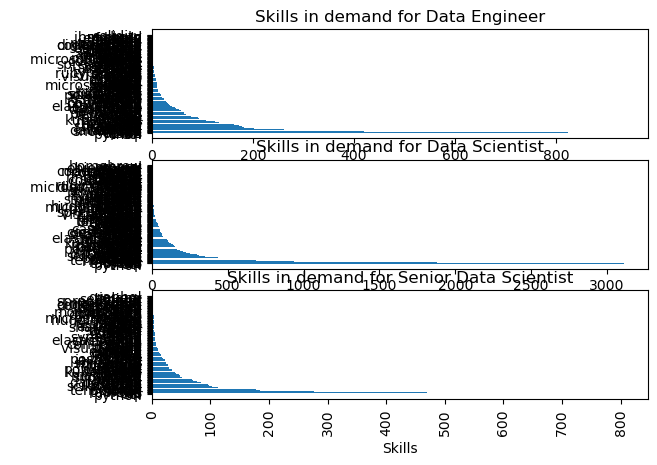

In [6]:
fig , ax= plt.subplots(3,1)
for i , job in enumerate(job_title):
    df_plot=df_skill_count[df_skill_count['job_title_short']==job]
    ax[i].barh(df_plot['job_skills'],df_plot['skill_count'])
    ax[i].set_title(f'Skills in demand for {job}')
    ax[i].set_xlabel('Skills')
    ax[i].set_ylabel(' ')
    plt.xticks(rotation=90)